<a href="https://colab.research.google.com/github/NaouresBzeouich/projet_traitement_d-image/blob/main/CNN_ASS_Pavia_Univarsity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Processing of Multispectral Data Project - A Study on Indian Pines And Pavia University

## Groupe:

- Naoures Bzeouich

- Omar Mejdi

- Mohamed Aziz Balti

- Ghassen Cherif

- Ahmed Silini

## installaton du données :

In [1]:
!pip install --quiet gdown

Indian_pines_corrected_id = '1qKiIK-ZZsb8-6LXJisVu-OGb5sqqJ9nK'
!gdown https://drive.google.com/uc?id={Indian_pines_corrected_id}

Indian_pines_id = '1U1GgOfIheD8ZjkY87x7MqV2ow4kw2kIi'
!gdown https://drive.google.com/uc?id={Indian_pines_id}

Indian_pines_gt_id= '1o2vUv8gs3z7k11SE7hjPiL1EoldFrzLD'
!gdown https://drive.google.com/uc?id={Indian_pines_gt_id}

pavia_U_gt_id = '1MHPc5ztgljCHhRh6ZBF2Tui85LaC0-NL'
!gdown https://drive.google.com/uc?id={pavia_U_gt_id}

pavia_U_id= '159g6cecio9v0tDRPIahcYvJVHaMaOBBY'
!gdown https://drive.google.com/uc?id={pavia_U_id}

Downloading...
From (original): https://drive.google.com/uc?id=1qKiIK-ZZsb8-6LXJisVu-OGb5sqqJ9nK
From (redirected): https://drive.google.com/uc?id=1qKiIK-ZZsb8-6LXJisVu-OGb5sqqJ9nK&confirm=t&uuid=30fab8f1-20f1-474f-ae56-a6e2d8f5d1ab
To: /content/Indian_pines_corrected.mat
100% 5.95M/5.95M [00:00<00:00, 29.5MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1U1GgOfIheD8ZjkY87x7MqV2ow4kw2kIi
From (redirected): https://drive.google.com/uc?id=1U1GgOfIheD8ZjkY87x7MqV2ow4kw2kIi&confirm=t&uuid=1b28e0c5-f71b-459b-8f10-7f11ed7e8ead
To: /content/Indian_pines.mat
100% 6.30M/6.30M [00:00<00:00, 49.6MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1o2vUv8gs3z7k11SE7hjPiL1EoldFrzLD
From (redirected): https://drive.google.com/uc?id=1o2vUv8gs3z7k11SE7hjPiL1EoldFrzLD&confirm=t&uuid=c5465469-14d9-44d0-abb3-bcd23dc70799
To: /content/Indian_pines_gt.mat
100% 1.12k/1.12k [00:00<00:00, 3.77MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1MHPc5ztgljC

## CNNASS Model Architecture

The model is a 3D Convolutional Neural Network (CNN), meaning it processes 3D data, not just 2D images, which is crucial for handling hyperspectral images (which have spatial and spectral dimensions).

The architecture is composed of two main convolutional layers, followed by a pooling layer and a fully connected layer. Let’s break it down:

1. Input Layer

Input Shape: The model receives input of shape (1, 103, 5, 5) where:

1 is the number of channels (since we are using a single hyperspectral cube with one spectral channel at a time).

103 is the number of spectral bands in the hyperspectral data (each pixel has 103 values corresponding to different wavelengths).

5x5 is the spatial size of the patch we’re extracting (i.e., each 3D patch is 5x5 pixels).

2. First Convolutional Layer (conv1)

Layer Type: 3D Convolution (nn.Conv3d)

Input Channels: 1 (the input is a single-channel 3D patch).

Output Channels: 4 (this is the number of filters or feature maps).

Kernel Size: (7, 3, 3) (7x3x3 spatial kernels).

Padding: (3, 1, 1) (padding applied to maintain spatial dimensions).

Output Shape: After applying this layer, the output shape becomes (4, 103, 5, 5) (4 feature maps with the same spatial size).

3. Batch Normalization (bn1)

Purpose: The batch normalization layer (nn.BatchNorm3d) is applied to each of the 4 output feature maps from the first convolutional layer.

Benefit: It normalizes each feature map to ensure faster training and stable convergence by controlling the mean and variance.

4. ReLU Activation (ReLU)

Purpose: After each convolution and batch normalization, we apply the ReLU activation function (F.relu()) to introduce non-linearity. This allows the network to learn more complex patterns.

5. Second Convolutional Layer (conv2)

Layer Type: 3D Convolution (nn.Conv3d)

Input Channels: 4 (the input is the 4 feature maps from the previous layer).

Output Channels: 8 (this is the number of filters or feature maps).

Kernel Size: (3, 3, 3) (3x3x3 spatial kernels).

Padding: 1 (this ensures the spatial dimensions are preserved).

Output Shape: After this layer, the output becomes (8, 103, 5, 5).

6. Batch Normalization (bn2)

Purpose: Another batch normalization layer applied to the output of the second convolutional layer. This layer ensures that the feature maps are normalized.

7. ReLU Activation (ReLU)

Purpose: Another ReLU activation to introduce non-linearity after the second convolutional layer.

8. Pooling Layer (pool)

Layer Type: Adaptive Average Pooling (nn.AdaptiveAvgPool3d)

Purpose: This layer compresses the feature maps into a fixed-size output, regardless of the input spatial size.

Output Size: (1, 1, 1), meaning the spatial dimensions are reduced to a 1x1x1 cube, and the network outputs a vector for each sample.

Why Adaptive? It adapts the pooling size based on the input feature map size, ensuring that no matter the input dimensions, the output is of fixed size (1,1,1 in this case).

9. Fully Connected Layer (fc)

Layer Type: Linear Layer (nn.Linear)

Input: The output from the pooling layer is a 1x1x1x8 vector, which is flattened into a vector of size 8.

Output: This layer outputs a vector with the size equal to the number of classes (9 in this case).

Activation: Since we are doing multi-class classification, the output layer produces raw class scores (before applying a softmax or loss function).


voici une image récapitulatif :

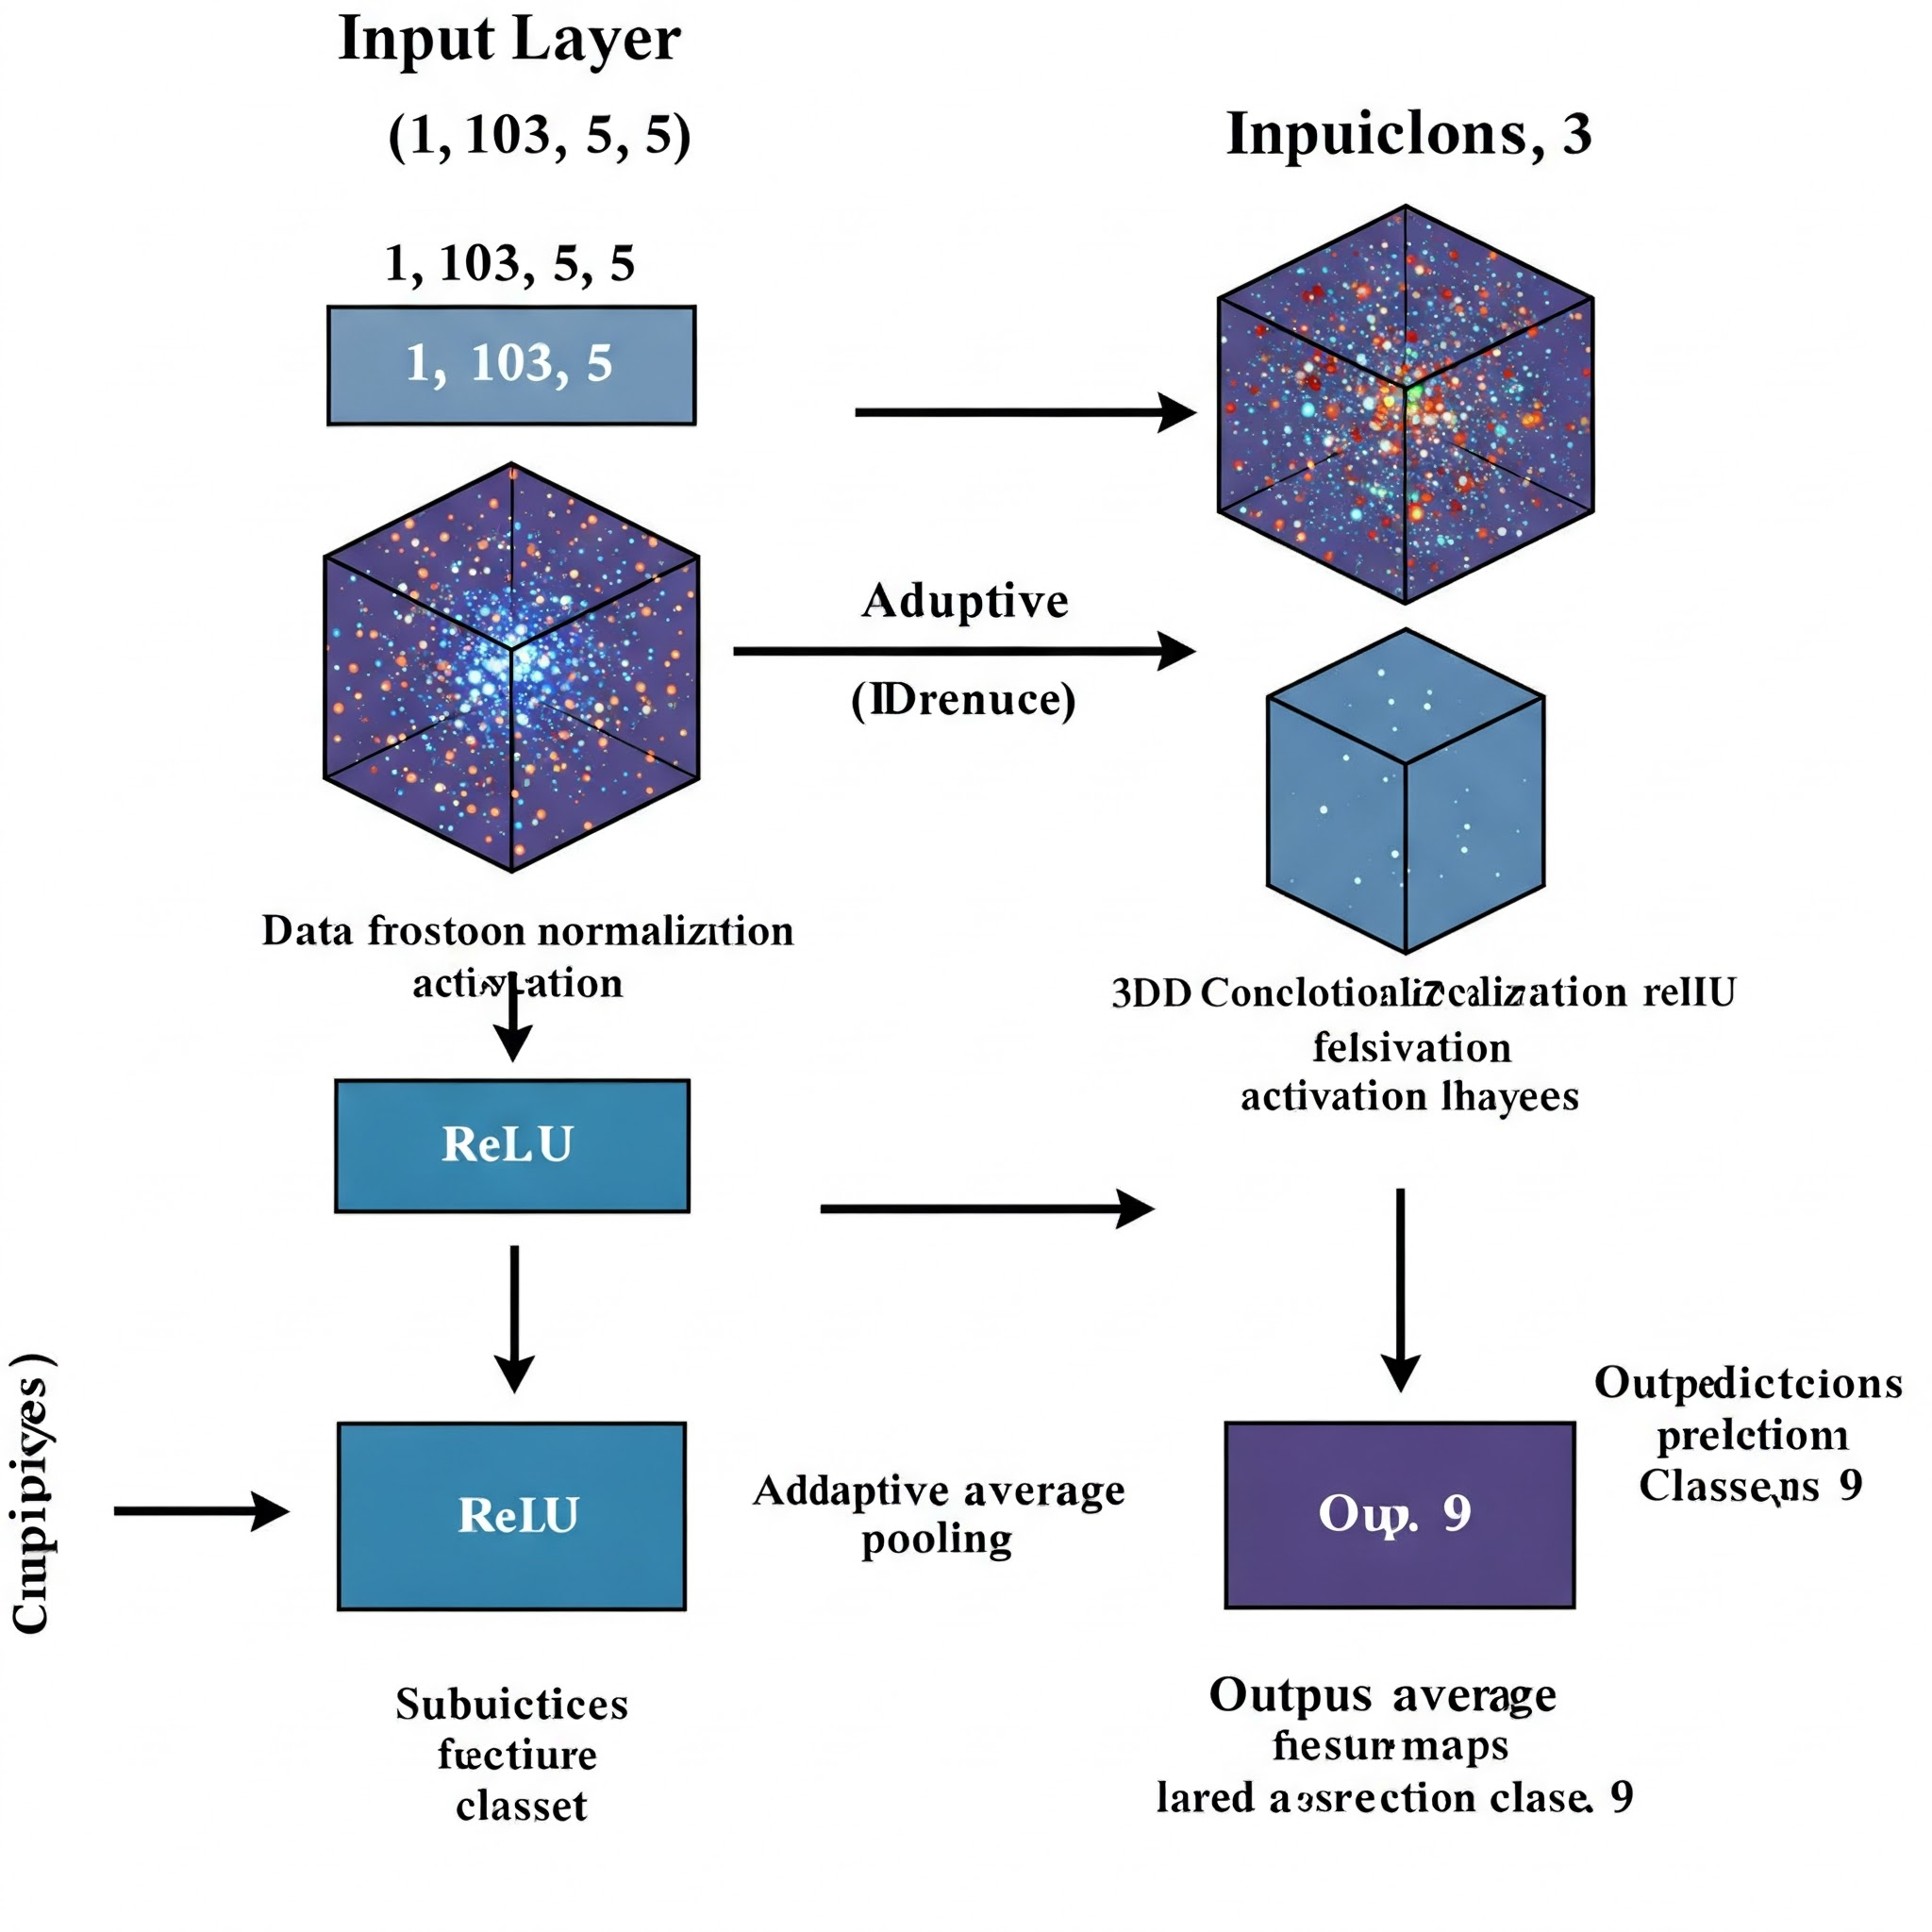

## CNN-ASS :

loading  data :

In [28]:
import scipy.io
import numpy as np

# Load the image and ground truth
data = scipy.io.loadmat('PaviaU.mat')
gt = scipy.io.loadmat('PaviaU_gt.mat')

# Extract arrays (you may need to check exact key names)
X = data[list(data.keys())[-1]]  # assuming the last key is the image
y = gt[list(gt.keys())[-1]]      # assuming the last key is the labels

# Ensure shapes
print('Image shape:', X.shape)  # (610, 340, 103)
print('GT shape:', y.shape)     # (610, 340)

Image shape: (610, 340, 103)
GT shape: (610, 340)


normalize the data :

In [29]:
def normalize(X):
    X = X.astype(np.float32)
    for band in range(X.shape[2]):
        min_val = np.min(X[:, :, band])
        max_val = np.max(X[:, :, band])
        X[:, :, band] = (X[:, :, band] - min_val) / (max_val - min_val + 1e-8)
    return X

X_norm = normalize(X)

Extract 3D Patches from the Image :


In [38]:
PATCH_SIZE = 7  # e.g., 5x5 window

def get_patches(X, y, patch_size=7):
    half = patch_size // 2
    X_padded = np.pad(X, ((half, half), (half, half), (0, 0)), mode='reflect')
    y_padded = np.pad(y, ((half, half), (half, half)), mode='constant', constant_values=0)

    patches = []
    labels = []
    for i in range(half, X.shape[0] + half):
        for j in range(half, X.shape[1] + half):
            label = y_padded[i, j]
            if label != 0:
                cube = X_padded[i - half:i + half + 1, j - half:j + half + 1, :]
                patches.append(cube)
                labels.append(label - 1)  # convert labels from 1–9 to 0–8

    return np.array(patches), np.array(labels)

X_patches, y_labels = get_patches(X_norm, y, patch_size=PATCH_SIZE)
print('Patches shape:', X_patches.shape)  # e.g., (N, 5, 5, 103)
print('Labels shape:', y_labels.shape)

Patches shape: (42776, 7, 7, 103)
Labels shape: (42776,)


In [31]:
import torch
from torch.utils.data import Dataset, DataLoader

class HyperspectralDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X).permute(0, 3, 1, 2).unsqueeze(1)  # (N, 1, 103, 5, 5)
        self.y = torch.tensor(y).long()

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Split into train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_patches, y_labels, test_size=0.2, random_state=42, stratify=y_labels)

train_dataset = HyperspectralDataset(X_train, y_train)
test_dataset = HyperspectralDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)


In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [33]:
class CNNASS(nn.Module):
    def __init__(self, num_classes=9):
        super(CNNASS, self).__init__()

        self.conv1 = nn.Conv3d(1, 4, kernel_size=(7, 3, 3), padding=(3, 1, 1))
        self.bn1 = nn.BatchNorm3d(4)

        self.conv2 = nn.Conv3d(4, 8, kernel_size=(3, 3, 3), padding=1)
        self.bn2 = nn.BatchNorm3d(8)

        self.pool = nn.AdaptiveAvgPool3d((1, 1, 1))  # compress to 1×1×1×8

        self.fc = nn.Linear(8, num_classes)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

In [34]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNNASS().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(25):
    model.train()
    total_loss = 0
    correct = 0

    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        correct += (outputs.argmax(1) == y_batch).sum().item()

    acc = correct / len(train_dataset)
    print(f"Epoch {epoch+1}: Loss={total_loss:.4f}, Accuracy={acc:.4f}")


Epoch 1: Loss=1371.0457, Accuracy=0.5546
Epoch 2: Loss=821.7542, Accuracy=0.7174
Epoch 3: Loss=692.7002, Accuracy=0.7525
Epoch 4: Loss=630.0178, Accuracy=0.7688
Epoch 5: Loss=567.6528, Accuracy=0.7962
Epoch 6: Loss=516.9103, Accuracy=0.8176
Epoch 7: Loss=488.6769, Accuracy=0.8276
Epoch 8: Loss=468.4519, Accuracy=0.8358
Epoch 9: Loss=456.0592, Accuracy=0.8388
Epoch 10: Loss=441.1861, Accuracy=0.8448
Epoch 11: Loss=438.4717, Accuracy=0.8454
Epoch 12: Loss=429.4962, Accuracy=0.8450
Epoch 13: Loss=417.9326, Accuracy=0.8514
Epoch 14: Loss=418.2927, Accuracy=0.8511
Epoch 15: Loss=408.5832, Accuracy=0.8554
Epoch 16: Loss=396.8098, Accuracy=0.8599
Epoch 17: Loss=396.5980, Accuracy=0.8580
Epoch 18: Loss=386.4249, Accuracy=0.8634
Epoch 19: Loss=381.1546, Accuracy=0.8643
Epoch 20: Loss=375.2675, Accuracy=0.8656
Epoch 21: Loss=378.0588, Accuracy=0.8652
Epoch 22: Loss=373.3487, Accuracy=0.8668
Epoch 23: Loss=370.3329, Accuracy=0.8678
Epoch 24: Loss=363.8623, Accuracy=0.8690
Epoch 25: Loss=362.2747,

In [35]:
model.eval()
correct = 0
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = model(X_batch)
        correct += (outputs.argmax(1) == y_batch).sum().item()

test_acc = correct / len(test_dataset)
print(f"Test Accuracy: {test_acc:.4f}")


Test Accuracy: 0.8620


In [36]:
import torch
import numpy as np

# Your full image (shape: 610, 340, 103)
image = sio.loadmat('PaviaU.mat')['paviaU']
ground_truth = sio.loadmat('PaviaU_gt.mat')['paviaU_gt']

# Normalize your image (optional but recommended)
image = (image - image.min()) / (image.max() - image.min())

# Prepare for patch-based prediction
patch_size = 5  # example: 5x5 spatial window
pad_width = patch_size // 2

# Padding the image to extract valid patches at borders
padded_image = np.pad(image, ((pad_width, pad_width), (pad_width, pad_width), (0, 0)), mode='reflect')

H, W, B = image.shape
predicted_labels = np.zeros((H, W), dtype=int)

model.eval()  # Put model in eval mode

with torch.no_grad():
    for i in range(H):
        for j in range(W):
            if ground_truth[i, j] == 0:
                continue  # skip unlabeled pixels

            # Extract patch
            patch = padded_image[i:i + patch_size, j:j + patch_size, :]
            patch = patch.transpose(2, 0, 1)  # (B, H, W)
            patch = patch[np.newaxis, np.newaxis, ...]  # (1, 1, B, H, W)

            input_tensor = torch.tensor(patch, dtype=torch.float32).to(device)  # put it on your device
            output = model(input_tensor)
            predicted_class = torch.argmax(output, dim=1).item()

            predicted_labels[i, j] = predicted_class + 1  # Add +1 if your classes start from 1 in GT


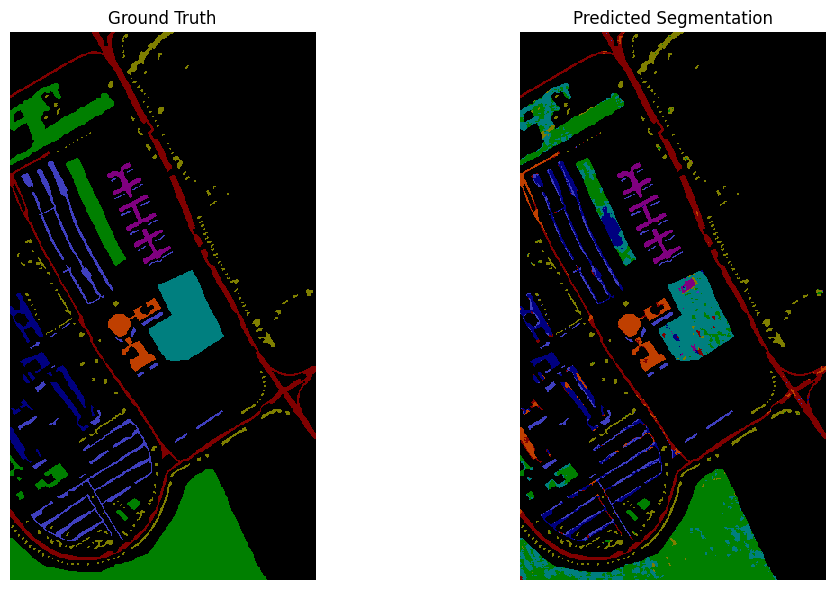

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio

# Load ground truth
gt_data = sio.loadmat('PaviaU_gt.mat')
ground_truth = gt_data['paviaU_gt']

# predicted_labels should already be obtained after testing your model
# Make sure it's the same shape as ground_truth: (610, 340)

# Define a color map (optional: add more if you have more classes)
from matplotlib.colors import ListedColormap

# Example colormap with 9 classes (add/change colors as needed)
cmap = ListedColormap([
    (0, 0, 0),         # class 0 - black (usually background)
    (0.5, 0, 0),       # class 1 - dark red
    (0, 0.5, 0),       # class 2 - dark green
    (0, 0, 0.5),       # class 3 - dark blue
    (0.5, 0.5, 0),     # class 4 - olive
    (0.5, 0, 0.5),     # class 5 - purple
    (0, 0.5, 0.5),     # class 6 - cyan
    (0.75, 0.25, 0),   # class 7 - orange-brown
    (0.25, 0.25, 0.75) # class 8 - light blue
])

# Plot ground truth and prediction side-by-side
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Ground Truth")
plt.imshow(ground_truth, cmap=cmap, interpolation='none')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Predicted Segmentation")
plt.imshow(predicted_labels, cmap=cmap, interpolation='none')
plt.axis('off')

plt.tight_layout()
plt.show()
